# A dataset about dogs.

Data from [a FOIL request to New York City](https://www.muckrock.com/foi/new-york-city-17/pet-licensing-data-for-new-york-city-23826/)

## Do your importing and your setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Read in the file `NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx` and look at the first five rows

In [2]:
df = pd.read_excel("NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx", na_values = ['???'])
df.head(1)

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19


## How many rows do you have in the data? What are the column types?

If there are more than 30,000 rows in your dataset, go back and only read in the first 30,000.

In [3]:
df.count

<bound method DataFrame.count of        Owner Zip Code            Animal Name Animal Gender  \
0               10024              BLUE MACK             M   
1               10461           Indie Zephir             M   
2               10013                  Bilal             M   
3               10025                  Buddy             M   
4               10013                    Ali             M   
5               10013                  Queen             F   
6               10035       Paige Sable Orta             F   
7               10465                   Yogi             M   
8               10013              Chewbacca             F   
9               10013             IAN                    M   
10              10028                   Lola             F   
11              11232                 muneca             F   
12              10022              Elizabeth             F   
13              11209                 Benson             M   
14              10025                

In [4]:
df.columns

Index(['Owner Zip Code', 'Animal Name', 'Animal Gender', 'Primary Breed',
       'Secondary Breed', 'Animal Dominant Color', 'Animal Secondary Color',
       'Animal Third Color', 'Animal Birth', 'Spayed or Neut',
       'Guard or Trained', 'Vaccinated', 'Application Date',
       'License Issued Date', 'License Expired Date'],
      dtype='object')

## Describe the dataset in words. What is each row? List two column titles along with what each of those columns means.

For example: “Each row is an animal in the zoo. `is_reptile` is whether the animal is a reptile or not”

In [5]:
# Each row is the information about a dog that is owned by a person. 
# "Animal Name" describes the name of the dog, "Animal Gender" describes the gender of the dog

# Your thoughts

Think of four questions you could ask this dataset. **Don't ask them**, just write them down in the cell below.

In [6]:
# Are there more male dogs or female doges?

# Looking at some dogs

## What are the most popular (primary) breeds of dogs? Graph the top 10.

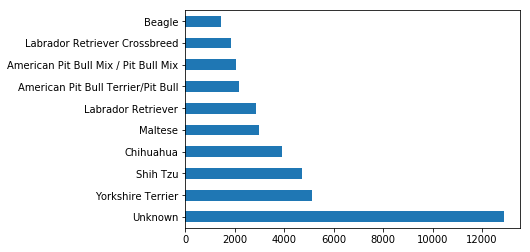

In [7]:
df['Primary Breed'].value_counts().head(10).plot(kind = 'barh')

## "Unknown" is a terrible breed! Graph the top 10 breeds that are NOT Unknown

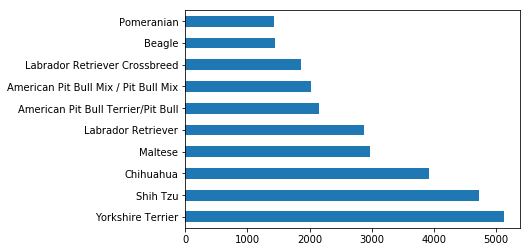

In [8]:
df[df['Primary Breed'] != 'Unknown']['Primary Breed'].value_counts().head(10).plot(kind = 'barh')

## What are the most popular dog names?

In [9]:
df['Animal Name'].value_counts().head(10)

UNKNOWN    742
Bella      527
Max        515
Charlie    403
Lola       387
Unknown    379
Rocky      354
Lucy       338
unknown    337
Coco       308
Name: Animal Name, dtype: int64

## Do any dogs have your name? How many dogs are named "Max," and how many are named "Maxwell"?

In [10]:
df[df['Animal Name'] == 'Max']['Animal Name'].value_counts()

Max    515
Name: Animal Name, dtype: int64

In [11]:
df[df['Animal Name'] == 'Maxwell']['Animal Name'].value_counts()

Maxwell    30
Name: Animal Name, dtype: int64

## What percentage of dogs are guard dogs?

Check out the documentation for [value counts](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html).

In [12]:
df["Guard or Trained"].value_counts(normalize=True)

No     0.998971
Yes    0.001029
Name: Guard or Trained, dtype: float64

## What are the actual numbers?

In [13]:
df["Guard or Trained"].value_counts()

No     49525
Yes       51
Name: Guard or Trained, dtype: int64

## Wait... if you add that up, is it the same as your number of rows? Where are the other dogs???? How can we find them??????

Use your `.head()` to think about it, then you'll do some magic with `.value_counts()`

In [14]:
df[df["Guard or Trained"].isnull()]

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12
5,10013,Queen,F,Akita Crossbreed,NaN,Charcoal,Red,NaN,2013-04-01,No,NaN,Yes,2014-09-12 16:14:48.487,2014-09-12,2017-09-12
6,10035,Paige Sable Orta,F,American Pit Bull Mix / Pit Bull Mix,NaN,White,Gray,NaN,2014-07-01,No,NaN,No,2014-09-12 16:22:54.113,2014-09-12,2017-09-12
11,11232,muneca,F,Beagle,NaN,White,Black,Brown,2013-05-01,Yes,NaN,Yes,2014-09-13 00:58:36.603,2014-09-13,2019-09-13
12,10022,Elizabeth,F,Cavalier King Charles Spaniel,NaN,Brown,White,NaN,2013-03-01,Yes,NaN,Yes,2014-09-13 07:07:54.303,2014-09-13,2019-09-13
14,10025,Dottie,F,"Poodle, Standard",NaN,Cream,NaN,NaN,2013-04-01,Yes,NaN,Yes,2014-09-13 11:28:32.237,2014-09-13,2017-09-13
15,11215,Lucy Moo Jung,F,Dachshund Smooth Coat Miniature,NaN,White,Black,NaN,2014-03-01,Yes,NaN,Yes,2014-09-13 13:40:23.943,2014-09-13,2019-09-13
18,11220,Ricky,M,German Shepherd Dog,NaN,Black,Tan,NaN,2014-07-01,No,NaN,No,2014-09-13 15:40:08.160,2014-09-13,2017-09-13
19,10002,Avery,F,American Pit Bull Terrier/Pit Bull,NaN,Gray,NaN,NaN,2014-06-01,No,NaN,No,2014-09-13 15:55:11.457,2014-09-13,2019-09-13


## Fill in all of those empty "Guard or Trained" columns with "No"

Then check your result with another `.value_counts()`

In [15]:
df["Guard or Trained"].fillna('No',inplace = True)
df

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,No,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12
3,10025,Buddy,M,Unknown,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,No,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12
5,10013,Queen,F,Akita Crossbreed,NaN,Charcoal,Red,NaN,2013-04-01,No,No,Yes,2014-09-12 16:14:48.487,2014-09-12,2017-09-12
6,10035,Paige Sable Orta,F,American Pit Bull Mix / Pit Bull Mix,NaN,White,Gray,NaN,2014-07-01,No,No,No,2014-09-12 16:22:54.113,2014-09-12,2017-09-12
7,10465,Yogi,M,Boxer,NaN,TAN,BLACK,NaN,2010-09-01,Yes,No,Yes,2014-09-12 16:47:35.317,2014-09-12,2017-10-02
8,10013,Chewbacca,F,Labrador Retriever Crossbreed,NaN,RED,NaN,NaN,2012-06-01,Yes,No,Yes,2014-09-12 17:42:56.647,2014-09-12,2019-10-01
9,10013,IAN,M,Unknown,GREYHOUND TER X,WHITE,BLACK,NaN,2006-01-01,Yes,No,Yes,2014-09-12 19:09:19.020,2014-09-12,2019-10-30


## What are the top dog breeds for guard dogs? 

In [16]:
df[df['Guard or Trained'] == 'Yes']['Primary Breed'].value_counts().head(10)

Unknown                                 11
German Shepherd Dog                      4
Rottweiler                               3
Labrador Retriever                       3
Chihuahua                                3
American Pit Bull Mix / Pit Bull Mix     3
Shih Tzu                                 2
Staffordshire Bull Terrier               2
Golden Retriever                         1
Shetland Sheepdog                        1
Name: Primary Breed, dtype: int64

## Create a new column called "year" that is the dog's year of birth

The `Animal Birth` column is a datetime, so you can get the year out of it with the code `df['Animal Birth'].apply(lambda birth: birth.year)`.

In [17]:
df['year'] = df['Animal Birth'].apply(lambda birth: birth.year)
df

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,year
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,No,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014
3,10025,Buddy,M,Unknown,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,No,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014
5,10013,Queen,F,Akita Crossbreed,NaN,Charcoal,Red,NaN,2013-04-01,No,No,Yes,2014-09-12 16:14:48.487,2014-09-12,2017-09-12,2013
6,10035,Paige Sable Orta,F,American Pit Bull Mix / Pit Bull Mix,NaN,White,Gray,NaN,2014-07-01,No,No,No,2014-09-12 16:22:54.113,2014-09-12,2017-09-12,2014
7,10465,Yogi,M,Boxer,NaN,TAN,BLACK,NaN,2010-09-01,Yes,No,Yes,2014-09-12 16:47:35.317,2014-09-12,2017-10-02,2010
8,10013,Chewbacca,F,Labrador Retriever Crossbreed,NaN,RED,NaN,NaN,2012-06-01,Yes,No,Yes,2014-09-12 17:42:56.647,2014-09-12,2019-10-01,2012
9,10013,IAN,M,Unknown,GREYHOUND TER X,WHITE,BLACK,NaN,2006-01-01,Yes,No,Yes,2014-09-12 19:09:19.020,2014-09-12,2019-10-30,2006


## Calculate a new column called “age” that shows approximately how old the dog is. How old are dogs on average?

In [18]:
df['age'] = 2017 - df['year']

In [19]:
df

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,year,age
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,10
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013,4
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,No,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014,3
3,10025,Buddy,M,Unknown,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008,9
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,No,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014,3
5,10013,Queen,F,Akita Crossbreed,NaN,Charcoal,Red,NaN,2013-04-01,No,No,Yes,2014-09-12 16:14:48.487,2014-09-12,2017-09-12,2013,4
6,10035,Paige Sable Orta,F,American Pit Bull Mix / Pit Bull Mix,NaN,White,Gray,NaN,2014-07-01,No,No,No,2014-09-12 16:22:54.113,2014-09-12,2017-09-12,2014,3
7,10465,Yogi,M,Boxer,NaN,TAN,BLACK,NaN,2010-09-01,Yes,No,Yes,2014-09-12 16:47:35.317,2014-09-12,2017-10-02,2010,7
8,10013,Chewbacca,F,Labrador Retriever Crossbreed,NaN,RED,NaN,NaN,2012-06-01,Yes,No,Yes,2014-09-12 17:42:56.647,2014-09-12,2019-10-01,2012,5
9,10013,IAN,M,Unknown,GREYHOUND TER X,WHITE,BLACK,NaN,2006-01-01,Yes,No,Yes,2014-09-12 19:09:19.020,2014-09-12,2019-10-30,2006,11


# Joining data together

## Which neighborhood does each dog live in?

You also have a (terrible) list of NYC neighborhoods in `zipcodes-neighborhoods.csv`. Join these two datasets together, so we know what neighborhood each dog lives in. **Be sure to not read it in as `df`, or else you'll overwrite your dogs dataframe.**

In [20]:
df_zip = pd.read_csv('zipcodes-neighborhoods.csv')

df = df.merge(df_zip, how='left', left_on='Owner Zip Code', right_on='zip')

df.head()


,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,year,age,neighborhood,zip,borough
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,10,Upper West Side,10024.0,Manhattan
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013,4,Southeast Bronx,10461.0,Bronx
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,No,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014,3,Greenwich Village and Soho,10013.0,Manhattan
3,10025,Buddy,M,Unknown,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008,9,Upper West Side,10025.0,Manhattan
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,No,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014,3,Greenwich Village and Soho,10013.0,Manhattan


## What is the most popular dog name in all parts of the Bronx? How about Brooklyn? The Upper East Side?

In [21]:
df[df['borough'] == 'Bronx']['Animal Name'].value_counts().head(1)

Rocky    60
Name: Animal Name, dtype: int64

## What is the most common dog breed in each of the neighborhoods of NYC?

In [22]:
df.groupby('borough')['Primary Breed'].value_counts().groupby(level=0).head(3)

borough        Primary Breed    
Bronx          Unknown              1121
               Yorkshire Terrier     753
               Shih Tzu              682
Brooklyn       Unknown              3067
               Yorkshire Terrier    1316
               Shih Tzu             1236
Manhattan      Unknown              4392
               Yorkshire Terrier    1402
               Chihuahua            1287
Queens         Unknown              2781
               Yorkshire Terrier    1085
               Shih Tzu             1042
Staten Island  Unknown              1404
               Yorkshire Terrier     525
               Shih Tzu              501
Name: Primary Breed, dtype: int64

## What breed of dogs are the least likely to be spayed? Male or female?

In [23]:
df[df['Spayed or Neut'] == 'No']['Primary Breed'].value_counts().head(1)

Yorkshire Terrier    1562
Name: Primary Breed, dtype: int64

In [24]:
df[df['Spayed or Neut'] == 'No']['Animal Gender'].value_counts().head(1)

M    9914
Name: Animal Gender, dtype: int64

## Make a new column called monochrome that is True for any animal that only has black, white or grey as one of its colors. How many animals are monochrome?

In [25]:
m_value = df['Animal Dominant Color'].isin(['BLACK','WHITE','GREY']) & df['Animal Secondary Color'].isin(['BLACK','WHITE','GREY'])& df['Animal Third Color'].isin(['BLACK','WHITE','GREY']) 
df['monochrome'] = m_value

df['monochrome'].value_counts()



False    81935
True         2
Name: monochrome, dtype: int64

## How many dogs are in each borough? Plot it in a graph.

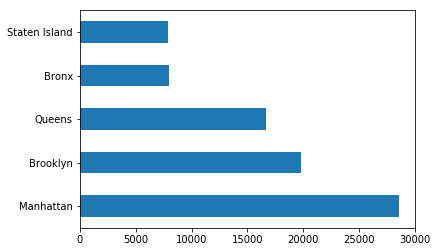

In [26]:
df['borough'].value_counts().plot(kind = 'barh')

## Which borough has the highest number of dogs per-capita?

You’ll need to merge in `population_boro.csv`

In [27]:
df_p = pd.read_csv('boro_population.csv')
df = df.merge(df_p, how='left', left_on='borough', right_on='borough')


## Make a bar graph of the top 5 breeds in each borough.

How do you groupby and then only take the top X number? You **really** should ask me, because it's kind of crazy.

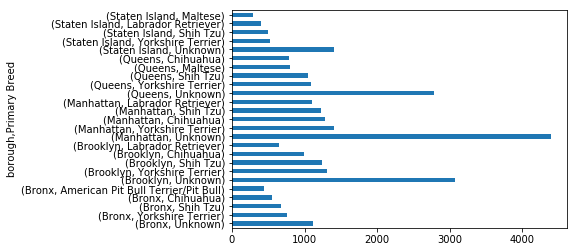

In [28]:
df.groupby('borough')['Primary Breed'].value_counts().groupby(level=0).head(5).plot(kind = 'barh')


## What percentage of dogs are not guard dogs?

In [29]:
df['Guard or Trained'].value_counts(normalize=True)

No     0.999378
Yes    0.000622
Name: Guard or Trained, dtype: float64